# Model 11

In [30]:
import keras
keras.__version__

'2.1.6'

In [31]:
!ln -s ../data/ ./
!ln -s ../out/ ./

ln: failed to create symbolic link './data': File exists
ln: failed to create symbolic link './out': File exists


In [32]:
import os

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools
from pylab import rcParams
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from numpy import genfromtxt
import tensorflow as tf
from keras.layers import Activation, Dense

from tensorflow.contrib import learn
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn import metrics


%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

# Load data for train

In [33]:
train = pd.read_csv('data/Train_data/dataset_rev4_train.csv')
#buffer datetime
buffer_datetime_train = train.datetime
#remove object
train = train.select_dtypes(exclude=['object'])
#replace misssing value
train.fillna(0,inplace=True)

# Load data for test

In [34]:
test = pd.read_csv('data/test_data/dataset_rev4_test.csv')
#buffer datetime
buffer_datetime_test = test.datetime
#remove object
test = test.select_dtypes(exclude=['object'])
#replace misssing value
test.fillna(0,inplace=True)

In [35]:
print('dimension of train:', train.shape)
print('dimension of test:', test.shape)

dimension of train: (131586, 6)
dimension of test: (16147, 5)


In [36]:
print("features:",list(train.columns))

features: ['I', 'T', 'UV', 'WS', 'RH', 'P']


# Remove outlier

In [37]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 13159
Number of rows without outliers: 118427


# Normalize

In [38]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('P')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)

mat_new = np.matrix(train.drop('P',axis = 1))
mat_y = np.array(train.P).reshape((118427,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

# Create training_set and prediction_set

In [39]:
# List of features
COLUMNS = col_train #column train (x train)
FEATURES = col_train_bis  #column train-label (x test)
LABEL = "P"

# Columns
feature_cols = FEATURES #(x test)

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS] #column train (x train)
prediction_set = train.P # column P

In [40]:
print(type(training_set))
print(type(prediction_set))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Create x_train and Test

In [41]:
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)

In [42]:
train_data = x_train.values
train_labels = y_train.values
test_data = x_test.values
test_labels = y_test.values

In [43]:
print(type(train_data))
print(type(train_labels))
print(type(test_data))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [60]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(5,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='relu'))

original_model.compile(optimizer='RMSprop',
                       loss='mse',
                       metrics=['mae'])

In [61]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(5,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='relu'))

smaller_model.compile(optimizer='rmsprop',
                      loss='mse',
                      metrics=['mae'])

In [62]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 79346 samples, validate on 39081 samples
Epoch 1/20
79346/79346 [==============================] - 2s 22us/step - loss: 0.0052 - mean_absolute_error: 0.0473 - val_loss: 0.0039 - val_mean_absolute_error: 0.0372
Epoch 2/20
79346/79346 [==============================] - 1s 7us/step - loss: 0.0039 - mean_absolute_error: 0.0368 - val_loss: 0.0038 - val_mean_absolute_error: 0.0356
Epoch 3/20
79346/79346 [==============================] - 1s 7us/step - loss: 0.0038 - mean_absolute_error: 0.0357 - val_loss: 0.0037 - val_mean_absolute_error: 0.0347
Epoch 4/20
79346/79346 [==============================] - 0s 6us/step - loss: 0.0037 - mean_absolute_error: 0.0353 - val_loss: 0.0037 - val_mean_absolute_error: 0.0342
Epoch 5/20
79346/79346 [==============================] - 1s 7us/step - loss: 0.0037 - mean_absolute_error: 0.0352 - val_loss: 0.0037 - val_mean_absolute_error: 0.0347
Epoch 6/20
79346/79346 [==============================] - 1s 7us/step - loss: 0.0037 - mean_absolute_error: 0

In [63]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 79346 samples, validate on 39081 samples
Epoch 1/20
79346/79346 [==============================] - 2s 23us/step - loss: 0.0240 - mean_absolute_error: 0.1132 - val_loss: 0.0089 - val_mean_absolute_error: 0.0716
Epoch 2/20
79346/79346 [==============================] - 1s 11us/step - loss: 0.0066 - mean_absolute_error: 0.0600 - val_loss: 0.0053 - val_mean_absolute_error: 0.0515
Epoch 3/20
79346/79346 [==============================] - 1s 10us/step - loss: 0.0048 - mean_absolute_error: 0.0478 - val_loss: 0.0045 - val_mean_absolute_error: 0.0445
Epoch 4/20
79346/79346 [==============================] - 1s 11us/step - loss: 0.0043 - mean_absolute_error: 0.0426 - val_loss: 0.0041 - val_mean_absolute_error: 0.0408
Epoch 5/20
79346/79346 [==============================] - 1s 9us/step - loss: 0.0040 - mean_absolute_error: 0.0397 - val_loss: 0.0040 - val_mean_absolute_error: 0.0383
Epoch 6/20
79346/79346 [==============================] - 1s 8us/step - loss: 0.0039 - mean_absolute_error

In [64]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

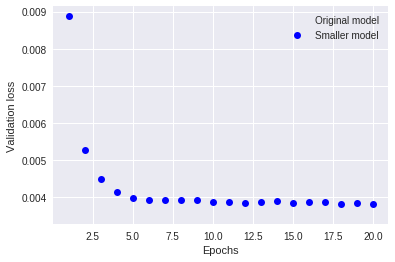

In [65]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [68]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(5,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='relu'))

bigger_model.compile(optimizer='rmsprop',
                     loss='mse',
                     metrics=['mae'])

In [69]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 79346 samples, validate on 39081 samples
Epoch 1/20
79346/79346 [==============================] - 7s 88us/step - loss: 0.1230 - mean_absolute_error: 0.2673 - val_loss: 0.1218 - val_mean_absolute_error: 0.2660
Epoch 2/20
79346/79346 [==============================] - 6s 81us/step - loss: 0.1230 - mean_absolute_error: 0.2673 - val_loss: 0.1218 - val_mean_absolute_error: 0.2660
Epoch 3/20
79346/79346 [==============================] - 6s 81us/step - loss: 0.1230 - mean_absolute_error: 0.2673 - val_loss: 0.1218 - val_mean_absolute_error: 0.2660
Epoch 4/20
79346/79346 [==============================] - 6s 81us/step - loss: 0.1230 - mean_absolute_error: 0.2673 - val_loss: 0.1218 - val_mean_absolute_error: 0.2660
Epoch 5/20
79346/79346 [==============================] - 8s 99us/step - loss: 0.1230 - mean_absolute_error: 0.2673 - val_loss: 0.1218 - val_mean_absolute_error: 0.2660
Epoch 6/20
79346/79346 [==============================] - 7s 88us/step - loss: 0.1230 - mean_absolute_err

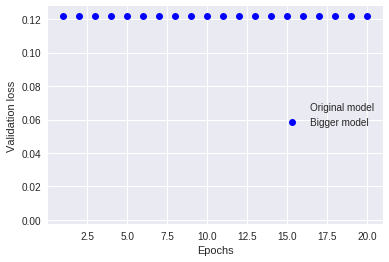

In [70]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

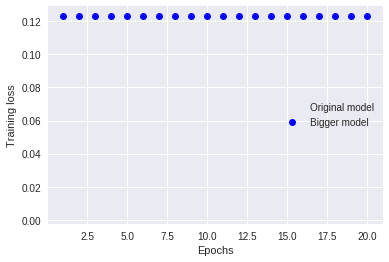

In [71]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [73]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(5,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='relu'))

In [74]:
l2_model.compile(optimizer='rmsprop',
                 loss='mse',
                 metrics=['mae'])

In [75]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 79346 samples, validate on 39081 samples
Epoch 1/20
79346/79346 [==============================] - 1s 15us/step - loss: 0.0284 - mean_absolute_error: 0.0721 - val_loss: 0.0170 - val_mean_absolute_error: 0.0415
Epoch 2/20
79346/79346 [==============================] - 1s 8us/step - loss: 0.0136 - mean_absolute_error: 0.0390 - val_loss: 0.0112 - val_mean_absolute_error: 0.0370
Epoch 3/20
79346/79346 [==============================] - 1s 7us/step - loss: 0.0101 - mean_absolute_error: 0.0381 - val_loss: 0.0096 - val_mean_absolute_error: 0.0403
Epoch 4/20
79346/79346 [==============================] - 1s 7us/step - loss: 0.0087 - mean_absolute_error: 0.0382 - val_loss: 0.0082 - val_mean_absolute_error: 0.0380
Epoch 5/20
79346/79346 [==============================] - 1s 7us/step - loss: 0.0079 - mean_absolute_error: 0.0382 - val_loss: 0.0075 - val_mean_absolute_error: 0.0379
Epoch 6/20
79346/79346 [==============================] - 0s 6us/step - loss: 0.0073 - mean_absolute_error: 0

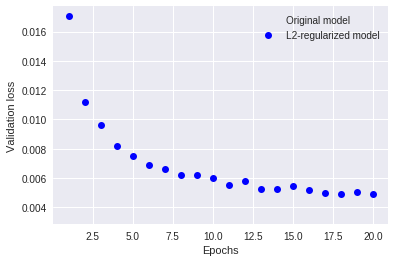

In [78]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [77]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [85]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(5,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='relu'))

dpt_model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])

In [86]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 79346 samples, validate on 39081 samples
Epoch 1/20
79346/79346 [==============================] - 1s 18us/step - loss: 0.0503 - mean_absolute_error: 0.1629 - val_loss: 0.0175 - val_mean_absolute_error: 0.1034
Epoch 2/20
79346/79346 [==============================] - 1s 8us/step - loss: 0.0224 - mean_absolute_error: 0.1126 - val_loss: 0.0097 - val_mean_absolute_error: 0.0683
Epoch 3/20
79346/79346 [==============================] - 1s 8us/step - loss: 0.0170 - mean_absolute_error: 0.0969 - val_loss: 0.0079 - val_mean_absolute_error: 0.0611
Epoch 4/20
79346/79346 [==============================] - 1s 8us/step - loss: 0.0144 - mean_absolute_error: 0.0885 - val_loss: 0.0071 - val_mean_absolute_error: 0.0597
Epoch 5/20
79346/79346 [==============================] - 1s 8us/step - loss: 0.0134 - mean_absolute_error: 0.0843 - val_loss: 0.0076 - val_mean_absolute_error: 0.0623
Epoch 6/20
79346/79346 [==============================] - 1s 7us/step - loss: 0.0126 - mean_absolute_error: 0

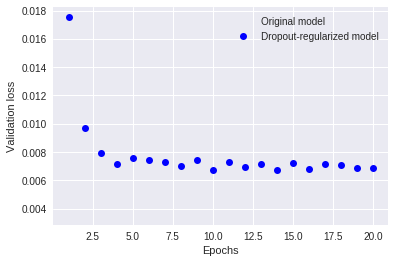

In [89]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()